## Dataset

For the problem part of the workbooks we are going to be working with the <b>wine preferences</b> dataset found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv) on the UCI machine learning repository website, which is often used as an example of classification or regression tasks. 

We have already downloaded the data from website for you and can be found in the <b>Data</b> folder in the online repository which you can download. Therefore, the first thing to do is to explore and understand the dataset so that you can create a decision tree classifier to predict the quality of the wine.

Firstly we want to import the relevant packages and read in the data which has been done for you, along with extracting some basic descriptions about the data so that you get a better understanding of what the data actually is.

In [1]:
#import the relevant factors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in the data
white_wine = pd.read_csv("Data/winequality-white.csv", sep=";")

In [3]:
#check to see what format the data is in
print("Rows, columns: " +str(white_wine.shape))

Rows, columns: (4898, 12)


In [4]:
#Check to see what is in the first 5 rows
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
#check to see what is in the last 5 rows
white_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [6]:
#extract summary statistics of the data
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Now that you have seen a small overview of the data, what does this tell you and what do you think an analysis using decision trees would extract from this? Is there anything you can extract already?

Given that this dataset is about wine quality we need to understand and visualise our dependent variable, which is the wine quality. 

We can first do this with a hitsogram to examine the distribution of quality ratings. What can you see from this plot? Can you think about how this would influence our analysis?

Text(0.5, 0, 'Quality')

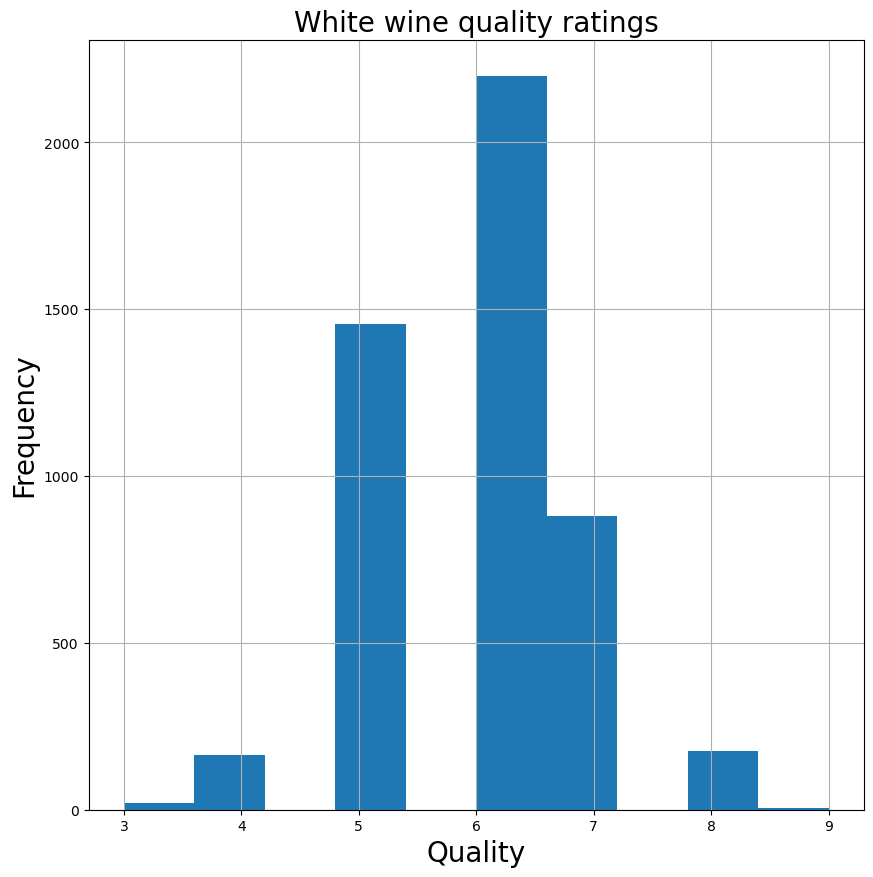

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

white_wine.quality.hist()
ax.set_title("White wine quality ratings", fontsize = 20)
ax.set_ylabel("Frequency", fontsize =20)
ax.set_xlabel("Quality", fontsize = 20)

Given that this is our dependent variable, we want to see how other factors may be correlated with this, and how the independent factors may be related to each other. We can do this using a correlation matrix using the following code.

Can you see any factors that are strongly correlated with wine quality? 
- How do you think this will influence the results?
- How would this play out in the decision tree?
- How would factors that are correlated with each other influence the decisino tree?

Text(0.5, 1.0, 'Correlation plot of wine quality')

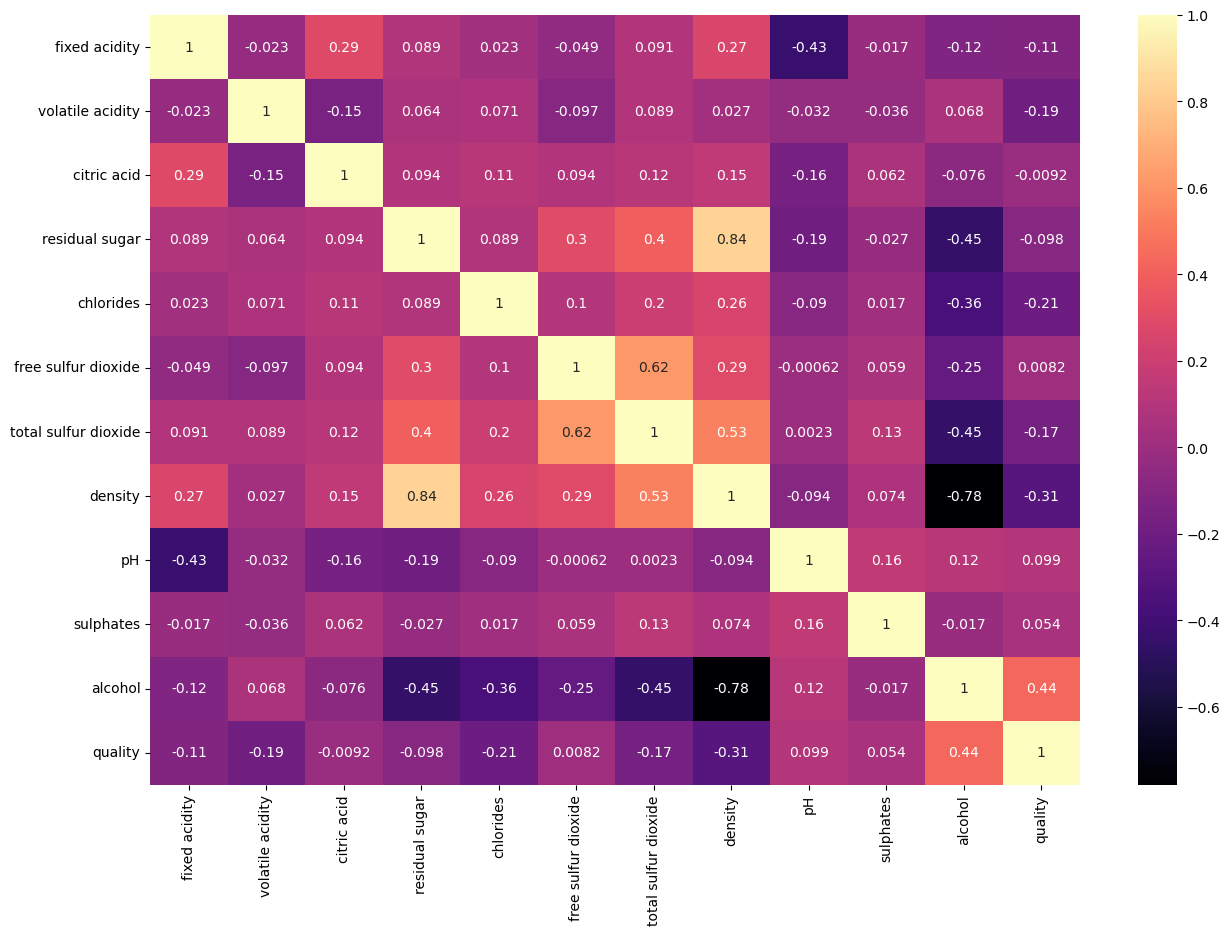

In [8]:
corr = white_wine.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
           annot = True, cmap ="magma")
ax.set_title("Correlation plot of wine quality")

For our purpose we want to create classifications which our decision can aim for. Here, we will define good quality wine as that scoring 7 or over, okay quality as 6, and bad quality as 5 or less.

How do you think this will influence the results? 

In [9]:
def qual_check(x):

    if x >= 7:
        return "good"
    if x > 5 and x <7:
        return "okay"
    else:
        return "bad"


white_wine["quality"] = white_wine["quality"].apply(qual_check)

<AxesSubplot:>

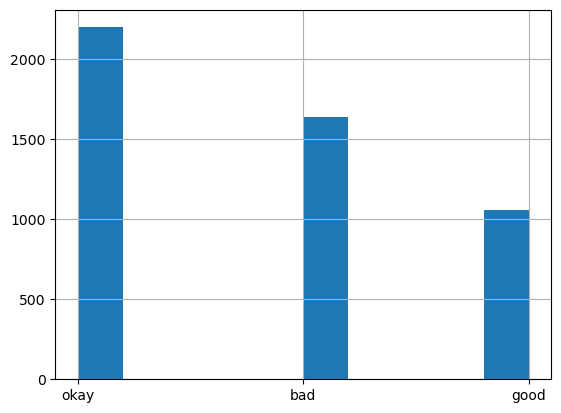

In [10]:
white_wine.quality.hist()

## Setting up the data

To create the decision tree we need to extract our dependent and indepdent variables. 

Fill in the ?? 

In [13]:
x = white_wine.drop(columns=['quality'])
y = white_wine['quality']

In [14]:
feature_names = x.columns
labels = y.unique()

The next thing to do is to split the data, what function do we need to import for that?

In [15]:
from sklearn.model_selection import train_test_split


Create your training and test data, with a test size of 30%. (You can change this up to 50% if you want to see how this affectes the outcome)

In [17]:
X_train, test_x, y_train, test_lab = train_test_split(x,y, test_size=0.3,random_state = 42)

## Creating the classifier

The next thing to do is to create the classifier. For this we import the DecisionTree Classifier.

In [19]:
from sklearn.tree import DecisionTreeClassifier

Apply the DecisionTreeClassifier, with a max depth of three and a random state of 42. 

In [21]:
clf_decision_tree = DecisionTreeClassifier(max_depth=3,random_state=42)
clf_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## Visualising the classifier

We can visualise the tree in two ways, firstly through a tree plot, as seen below.

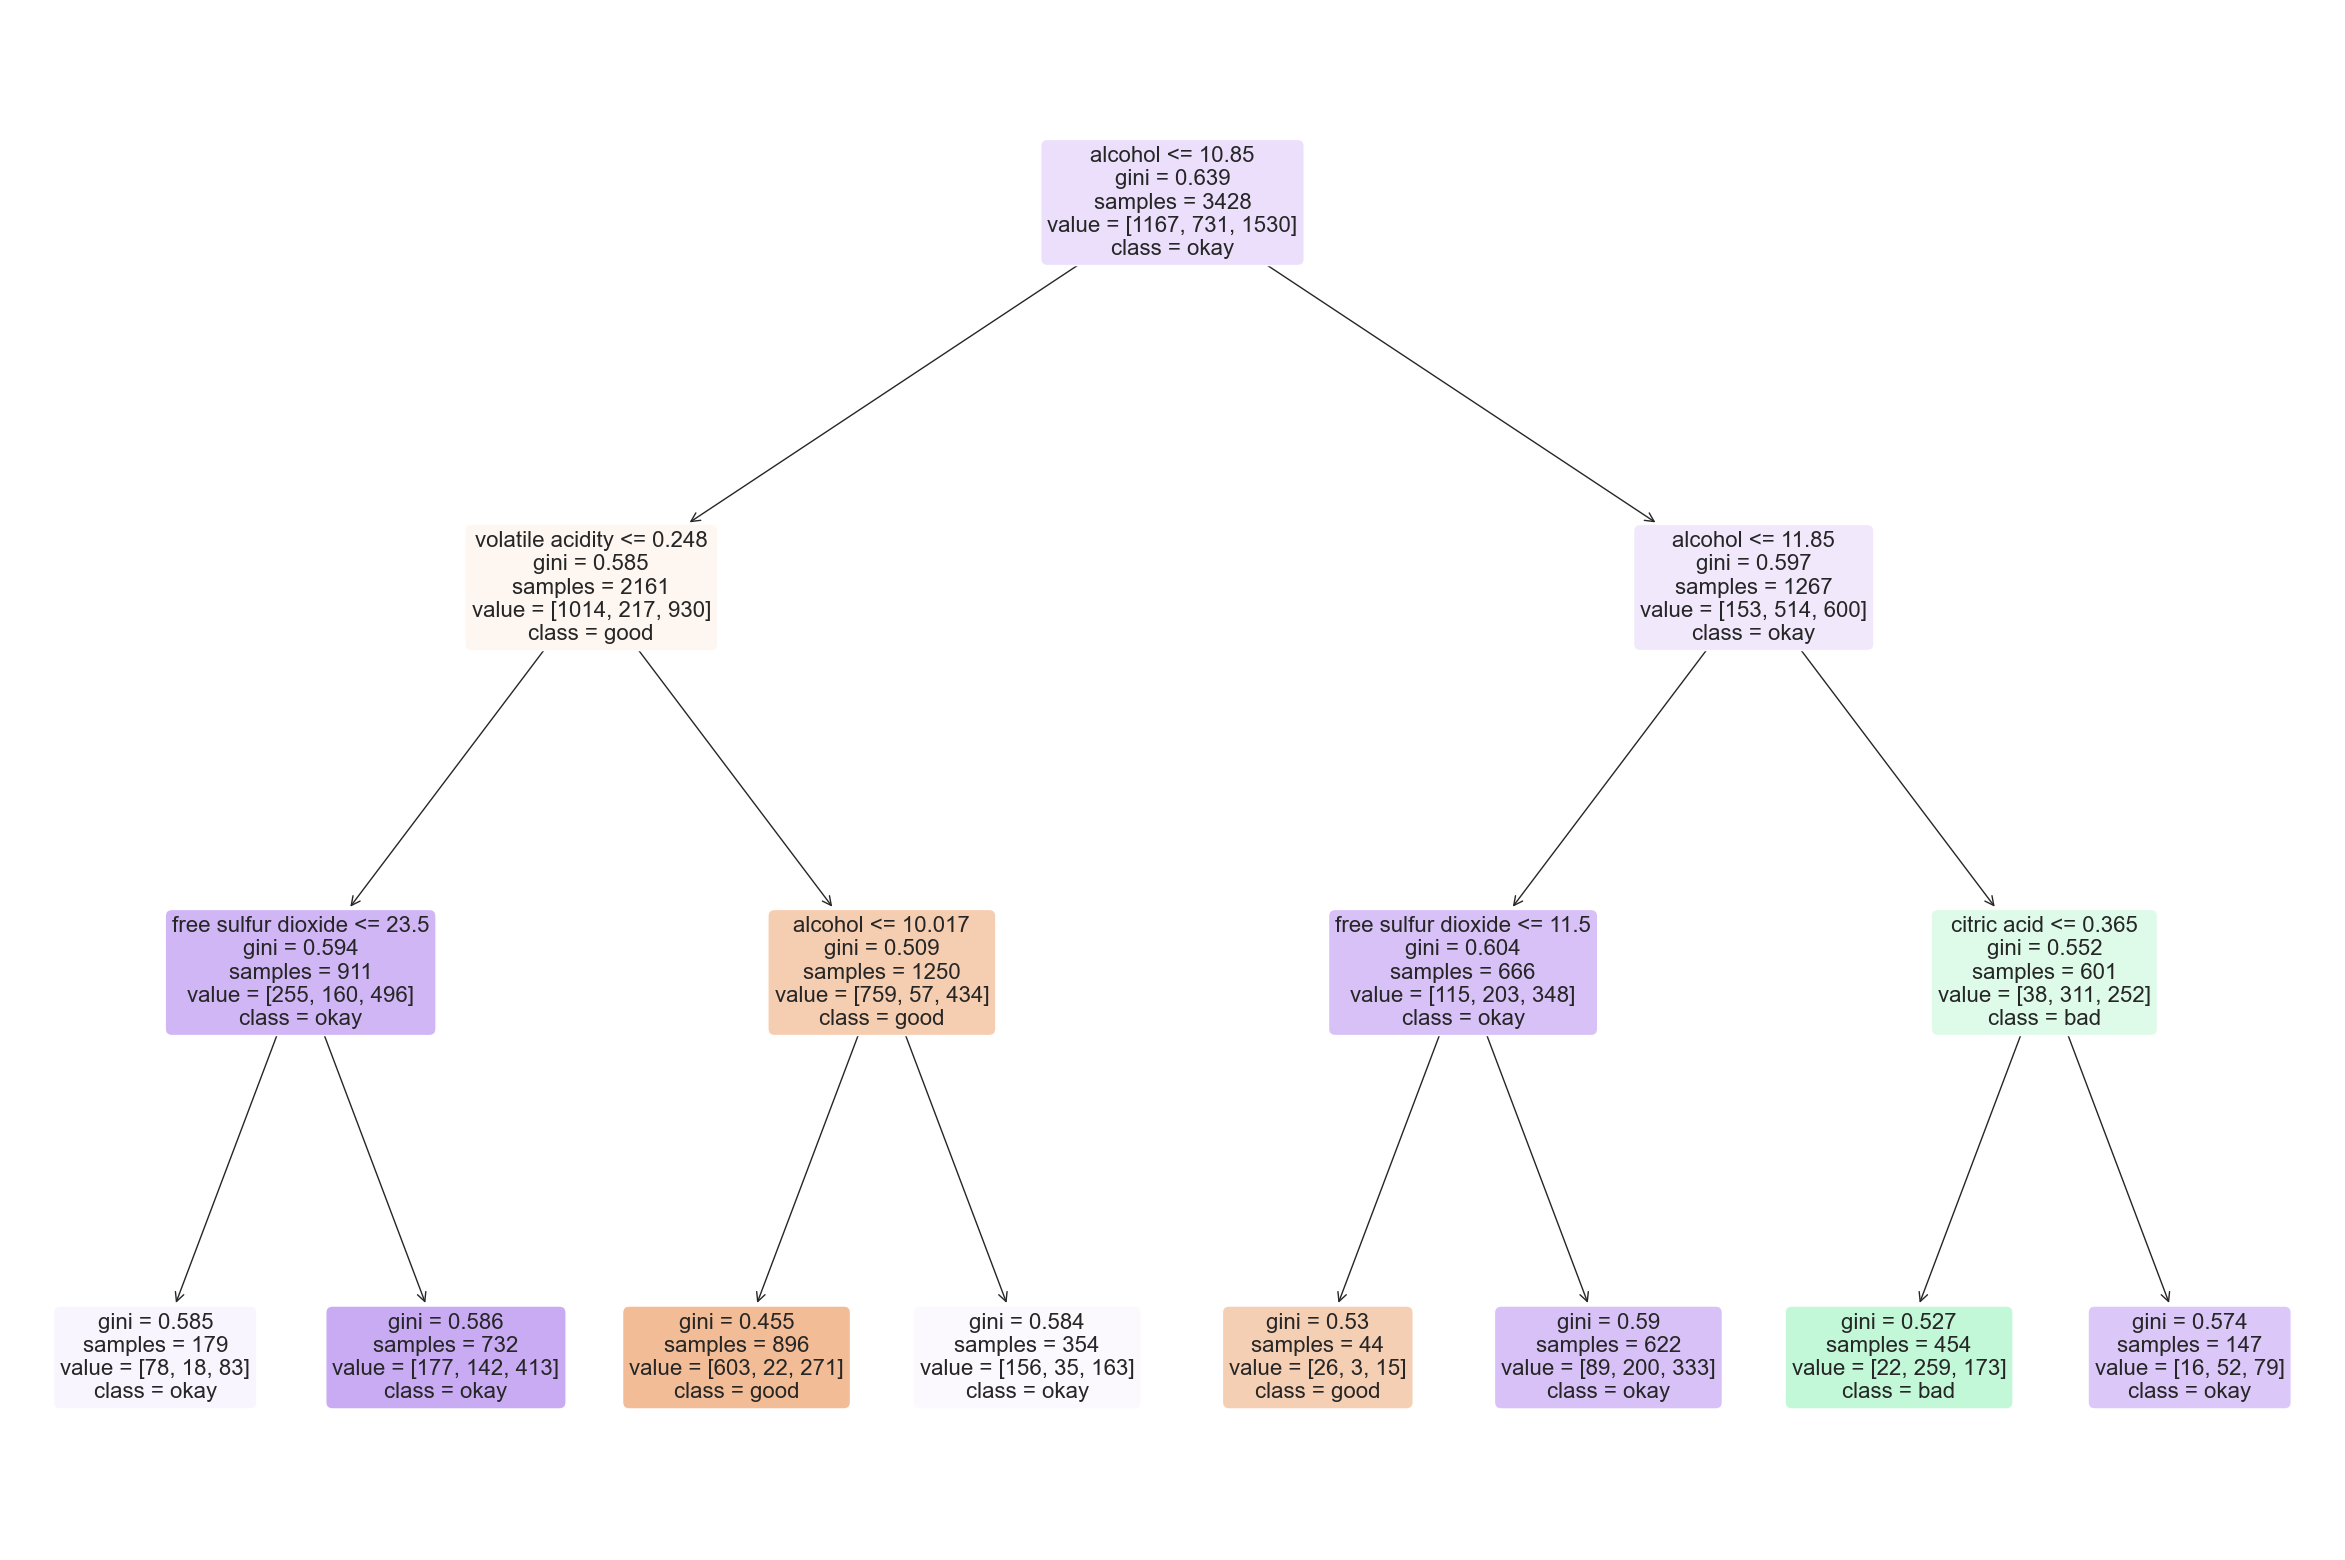

In [36]:
from sklearn import tree

plt.figure(figsize=(30,20))
a = tree.plot_tree(clf_decision_tree,
                   feature_names = feature_names,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=16)

plt.show()

## Predicting

We next want to use the decision tree to predict. Which dataset do we want to use to predict our test y values?

In [23]:
test_pred_decision_tree = clf_decision_tree.predict(test_x)

## Evaluating

After we have predicted, we want to be able to evalute the results. Complete the code to create a confusion matrix.

In [24]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_lab,test_pred_decision_tree)

In [25]:
print(confusion_matrix)

[[249  10 214]
 [ 12 103 214]
 [144  90 434]]


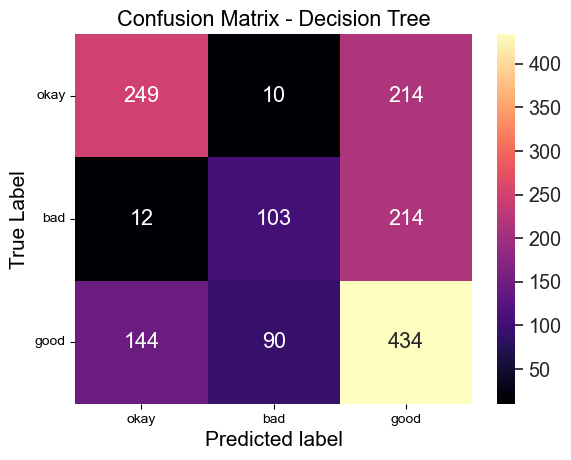

<Figure size 1000x700 with 0 Axes>

In [26]:
matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xticklabels(['']+labels)
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_yticklabels(list(labels), rotation = 0)
ax.set_ylabel("True Label", fontsize=15)
plt.show()

What does this tell us?

The next thing we want to measure is the accuracy. What do we check the test labels against?

In [29]:
metrics.accuracy_score(test_lab, test_pred_decision_tree)

0.5346938775510204

We then want to understand the Precision, Recall, and f1 score individually. 

Fill each code block with the ncessary code to create three individual pandas dataframes.

In [32]:
precision = metrics.precision_score(test_lab, test_pred_decision_tree, 
                                  average=None)
precision_results = pd.DataFrame(precision, index=labels)

#renaming results column
precision_results.rename(columns={0:'Precision'}, inplace =True)

precision_results

,Precision
good,0.614815
bad,0.507389
okay,0.503480


In [33]:
recall = metrics.recall_score(test_lab, test_pred_decision_tree, 
                              average =None)
recall_results = pd.DataFrame(recall, index= labels)

recall_results.rename(columns ={0:'Recall'}, inplace =True)
recall_results

,Recall
good,0.526427
bad,0.313070
okay,0.649701


In [34]:
f1 = metrics.f1_score(test_lab, test_pred_decision_tree, average=None)
f1_results = pd.DataFrame(f1, index=labels)

#rename results column
f1_results.rename(columns={0:'f1'}, inplace=True)
f1_results

,f1
good,0.567198
bad,0.387218
okay,0.567320


Extract the full classification report to combine the precision, recall, f1-score and support into a single table.

What do these tell us?

In [35]:
print(metrics.classification_report(test_lab, test_pred_decision_tree))

              precision    recall  f1-score   support

         bad       0.61      0.53      0.57       473
        good       0.51      0.31      0.39       329
        okay       0.50      0.65      0.57       668

    accuracy                           0.53      1470
   macro avg       0.54      0.50      0.51      1470
weighted avg       0.54      0.53      0.53      1470



Fill in the blanks to check the feature importances.

Why is this not a reliable indicator for a decision tree?

Perform a gridscreach with a max_Depth of 3,4,5,6.

What other hyperparameers can you change with this? Try them out to see what different results you get.

Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on a the specific parameter values of a model. The model is also known as an estimator. Grid search exercise can save us time, effort and resources.

min_samples_split specifies the minimum number of samples required to split an internal node

In [42]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'max_depth': [3,4,5,6], 
                     'min_samples_split': [1,2,3,4,5]}]

scores = ['recall']

for score in scores:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    clf = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters,
        scoring = f'{score}_macro'
    )
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for recall

Best parameters set found on development set:

{'max_depth': 6, 'min_samples_split': 3}

Grid scores on development set:
nan (+/-nan) for {'max_depth': 3, 'min_samples_split': 1}
0.506 (+/-0.030) for {'max_depth': 3, 'min_samples_split': 2}
0.506 (+/-0.030) for {'max_depth': 3, 'min_samples_split': 3}
0.506 (+/-0.030) for {'max_depth': 3, 'min_samples_split': 4}
0.506 (+/-0.030) for {'max_depth': 3, 'min_samples_split': 5}
nan (+/-nan) for {'max_depth': 4, 'min_samples_split': 1}
0.520 (+/-0.028) for {'max_depth': 4, 'min_samples_split': 2}
0.520 (+/-0.028) for {'max_depth': 4, 'min_samples_split': 3}
0.520 (+/-0.028) for {'max_depth': 4, 'min_samples_split': 4}
0.521 (+/-0.028) for {'max_depth': 4, 'min_samples_split': 5}
nan (+/-nan) for {'max_depth': 5, 'min_samples_split': 1}
0.528 (+/-0.012) for {'max_depth': 5, 'min_samples_split': 2}
0.527 (+/-0.011) for {'max_depth': 5, 'min_samples_split': 3}
0.528 (+/-0.011) for {'max_depth': 5, 'min_sample

C:\Users\tarik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tarik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tarik\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\tarik\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0